# Example of creating a tilling dataset

In [1]:
from segmentation.scr.create_tilling_data import *
import torch

In [2]:
train_set = TiledDataset(
    name_data='kidney_1_tilling',
    path_img_dir=CFG.path_img_kidney1,
                         path_lb_dir=CFG.path_lb_kidney1,
                         cache_dir=CFG.cache_dir 
                         )

Reading images:   0%|          | 0/2279 [00:00<?, ?it/s]

Generating tiles: 100%|██████████| 2279/2279 [00:17<00:00, 132.01it/s]

Dataset contains 1528 empty and 12146 non-empty tiles.


In [4]:
loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=5,
    shuffle=False,
    pin_memory=True
)

In [5]:
for x in tqdm(loader, desc='tiling dataset to disk'):
    pass

tiling dataset to disk: 100%|██████████| 2735/2735 [02:02<00:00, 22.34it/s]


In [6]:
train_set.df.to_csv('data/kidney_1_tilling.csv')

In [8]:
import matplotlib.pyplot as plt
import cv2

In [34]:
msk = cv2.imread('data\kidney_1_tilling\labels\\0070_400_0_512_512.png', cv2.IMREAD_GRAYSCALE)

In [35]:
msk.max()

1

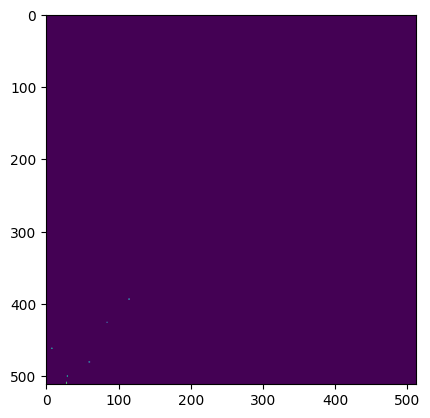

In [36]:
plt.imshow(msk)